In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Load the datasets
movies = pd.read_csv("tmdb_5000_movies.csv")
credits = pd.read_csv("tmdb_50001_credits.csv")

In [6]:
print("Movies Dataset:\n", movies.head())
print("\nCredits Dataset:\n", credits.head())

Movies Dataset:
       budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
1  300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
2  245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
3  250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
4  260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                       homepage      id  \
0                   http://www.avatarmovie.com/   19995   
1  http://disney.go.com/disneypictures/pirates/     285   
2   http://www.sonypictures.com/movies/spectre/  206647   
3            http://www.thedarkknightrises.com/   49026   
4          http://movies.disney.com/john-carter   49529   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   
1  [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
2  

In [7]:
merged_data = movies.merge(credits, left_on='id', right_on='movie_id')

In [8]:
print("\nMovies Dataset Info:")
print(movies.info())
print("\nCredits Dataset Info:")
print(credits.info())


Movies Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1635 entries, 0 to 1634
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                1635 non-null   int64  
 1   genres                1635 non-null   object 
 2   homepage              752 non-null    object 
 3   id                    1635 non-null   int64  
 4   keywords              1635 non-null   object 
 5   original_language     1635 non-null   object 
 6   original_title        1635 non-null   object 
 7   overview              1635 non-null   object 
 8   popularity            1635 non-null   float64
 9   production_companies  1635 non-null   object 
 10  production_countries  1635 non-null   object 
 11  release_date          1635 non-null   object 
 12  revenue               1635 non-null   int64  
 13  runtime               1635 non-null   int64  
 14  spoken_languages      1635 non-null   object 
 15 

In [9]:
sns.set(style="whitegrid")

In [10]:
movies['genres'] = movies['genres'].apply(lambda x: eval(x))  # Convert string to list of dictionaries
movies['genre_names'] = movies['genres'].apply(lambda x: [i['name'] for i in x])

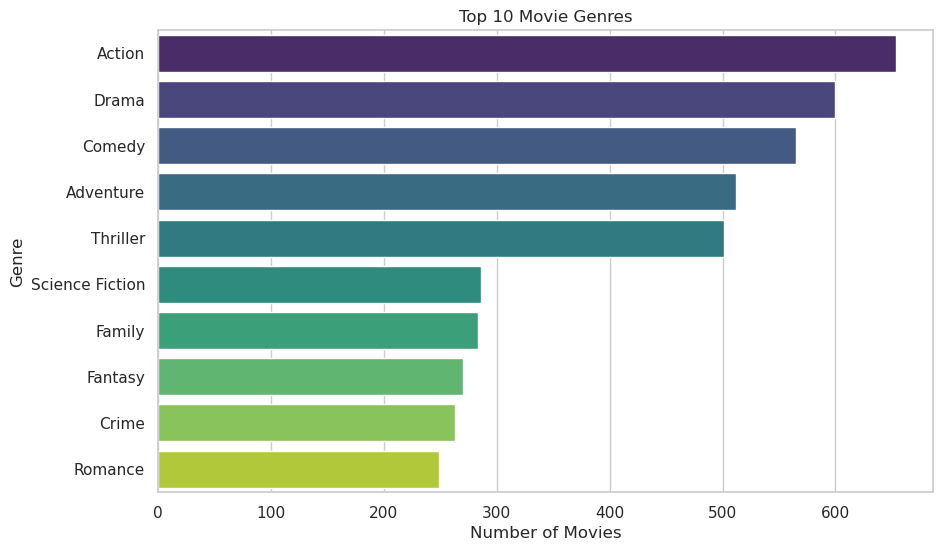

In [11]:
genre_counts = pd.Series([genre for sublist in movies['genre_names'] for genre in sublist]).value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette="viridis")
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

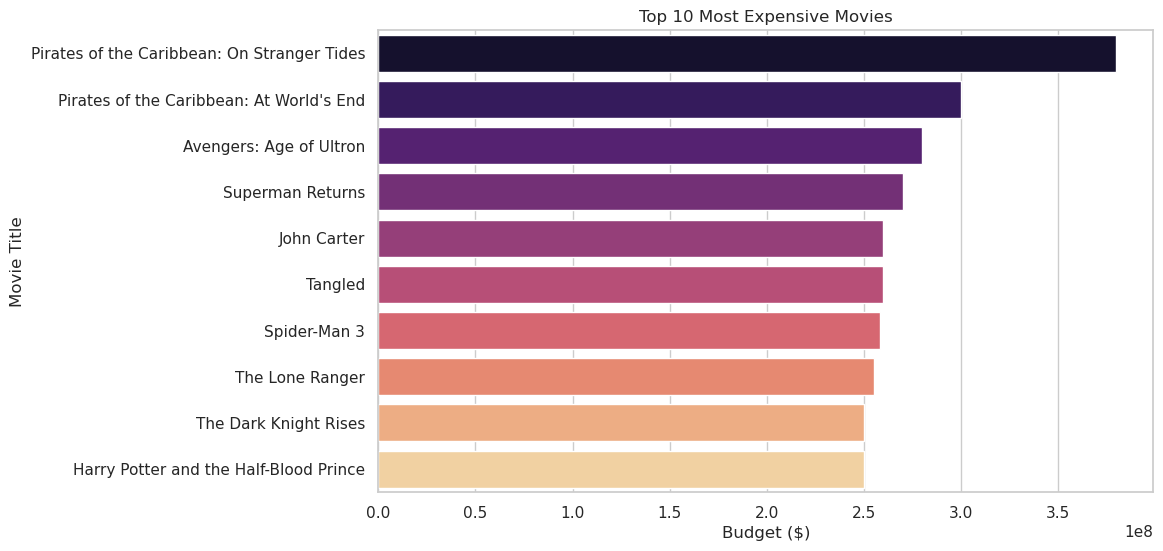

In [12]:
most_expensive = movies.nlargest(10, 'budget')[['title', 'budget']]
plt.figure(figsize=(10, 6))
sns.barplot(x=most_expensive['budget'], y=most_expensive['title'], palette="magma")
plt.title("Top 10 Most Expensive Movies")
plt.xlabel("Budget ($)")
plt.ylabel("Movie Title")
plt.show()

In [13]:
movies['release_date'] = pd.to_datetime(movies['release_date'], errors='coerce')
movies['year'] = movies['release_date'].dt.year
avg_popularity = movies.groupby('year')['popularity'].mean()

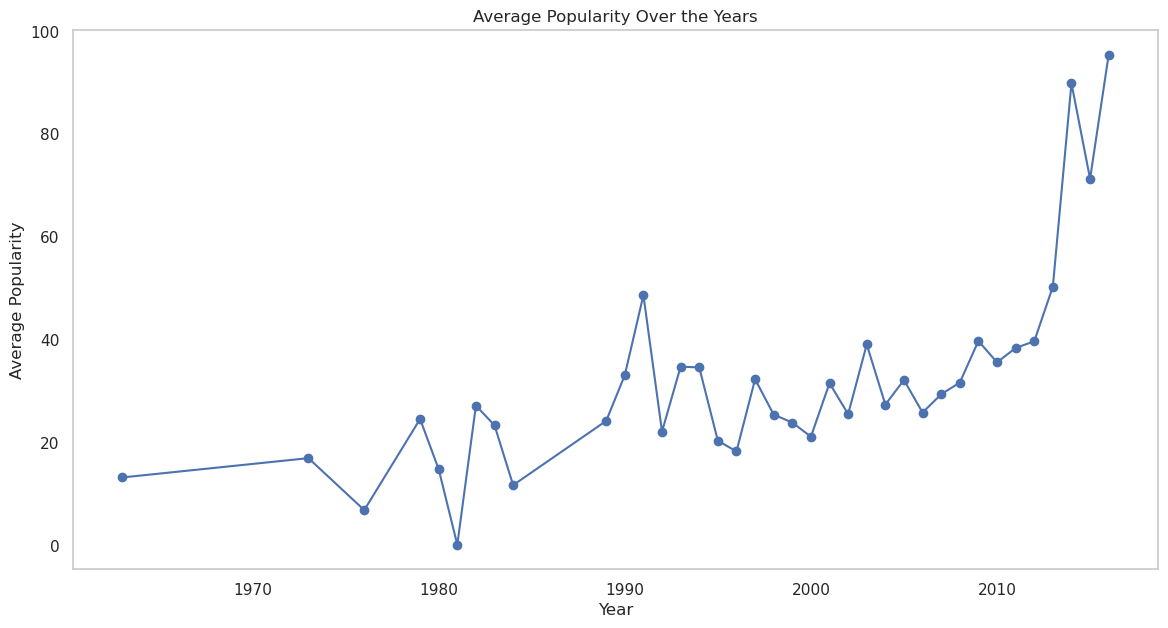

In [14]:
plt.figure(figsize=(14, 7))
plt.plot(avg_popularity.index, avg_popularity.values, marker='o', linestyle='-', color='b')
plt.title("Average Popularity Over the Years")
plt.xlabel("Year")
plt.ylabel("Average Popularity")
plt.grid()
plt.show()

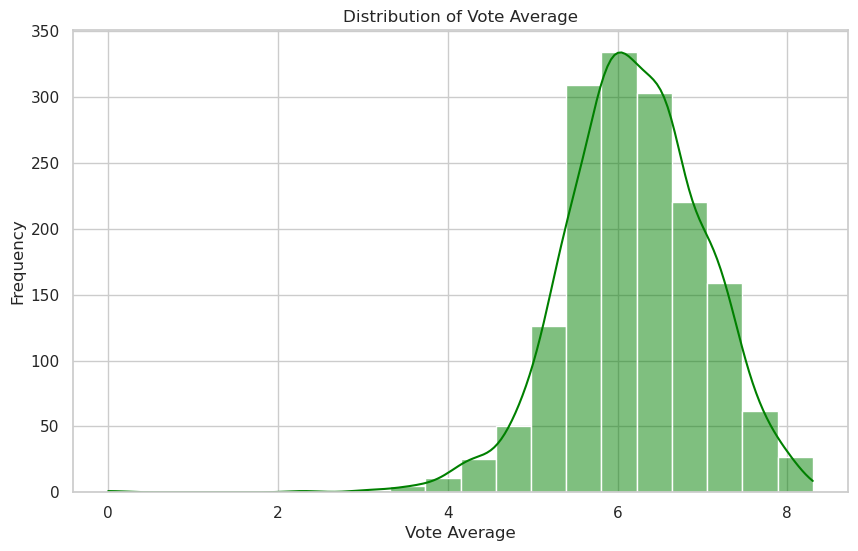

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(movies['vote_average'], bins=20, kde=True, color='green')
plt.title("Distribution of Vote Average")
plt.xlabel("Vote Average")
plt.ylabel("Frequency")
plt.show()